# 1. 장르에 따른 관객수 차이

In [1]:
# 라이브러리
import platform
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# 한글 폰트 오류
def set_plt() -> None:
    ## set plt minus font
    plt.rcParams["axes.unicode_minus"] = False

    ## set font
    system_name = platform.system()
    if system_name == "Windows":
        # Windows
        plt.rc("font", family="Malgun Gothic")
    elif system_name == "Darwin":
        # Mac
        plt.rc("font", family="AppleGothic")
    elif system_name == "Linux":
        # Linux
        path = "/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf"
        font_name = font_manager.FontProperties(fname=path, size=12)
        plt.rc("font", family=font_name)
    else:
        print("Not support")

# 파일 불러오기
## 박스오피스 통계
box_before = pd.read_excel("./data/KOBIS_before.xlsx",thousands = ',')
box_after = pd.read_excel("./data/KOBIS_after.xlsx",thousands = ',')
## 영화 장르
genre_before = pd.read_csv("./data/genre_before.csv")
genre_after = pd.read_csv("./data/genre_after.csv")
## 영화 감독, 배우
act_before = pd.read_csv("./data/act_before.csv")
act_after = pd.read_csv("./data/act_after.csv")


## 전처리

In [2]:
# 장르 데이터
## 장르1만 추출, 복사본으로 작업
genre_before_copy = genre_before[['영화명','장르1']].copy()
genre_after_copy = genre_after[['영화명','장르1']].copy()

## 열 이름 변경
df_genre_before = genre_before_copy.rename(columns={'장르1':'장르'})
df_genre_after = genre_after_copy.rename(columns={'장르1':'장르'})

In [3]:
# 영화 데이터
## 복사본으로 작업
box_before_copy = box_before.copy()
box_after_copy = box_after.copy()

In [4]:
# 필요한 열만 추출
df_box_before = box_before_copy[['영화명','개봉일','매출액','관객수','상영횟수']]
df_box_after = box_after_copy[['영화명','개봉일','매출액','관객수','상영횟수']]

# 변수 유형 확인
df_box_before.info()
# nan값 확인
df_box_before.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9941 entries, 0 to 9940
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   영화명     9939 non-null   object
 1   개봉일     6346 non-null   object
 2   매출액     9941 non-null   int64 
 3   관객수     9941 non-null   int64 
 4   상영횟수    9941 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 388.4+ KB


,영화명,개봉일,매출액,관객수,상영횟수
9936,사랑의 변주곡,NaN,1133000,503,20
9937,동주,2016-02-17,5575000,550,5
9938,캘리포니아 타이프라이터,2019-07-25,3815000,549,34
9939,NaN,NaN,1813963809238,216385269,6543797
9940,NaN,NaN,1913989080068,226678777,6871909


In [5]:
# 날짜 유형 변경
df_box_before['개봉일'] = pd.to_datetime(df_box_before['개봉일'])
df_box_after['개봉일'] = pd.to_datetime(df_box_after['개봉일'])

# NaN값 삭제
df_box_before = df_box_before.dropna()
df_box_after = df_box_after.dropna()

C:\Users\User\AppData\Local\Temp\ipykernel_14116\3174889270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_box_before['개봉일'] = pd.to_datetime(df_box_before['개봉일'])
C:\Users\User\AppData\Local\Temp\ipykernel_14116\3174889270.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_box_after['개봉일'] = pd.to_datetime(df_box_after['개봉일'])


In [6]:
# 관객수 순으로 정렬
df_box_before = df_box_before.sort_values(by='관객수', ascending=False)
df_box_after = df_box_after.sort_values(by='관객수', ascending=False)

# 관객수 TOP 10 선정
top10_box_before = df_box_before.iloc[:10]
top10_box_after = df_box_after.iloc[:10]

## 시각화 - TOP 10 영화별 관객수

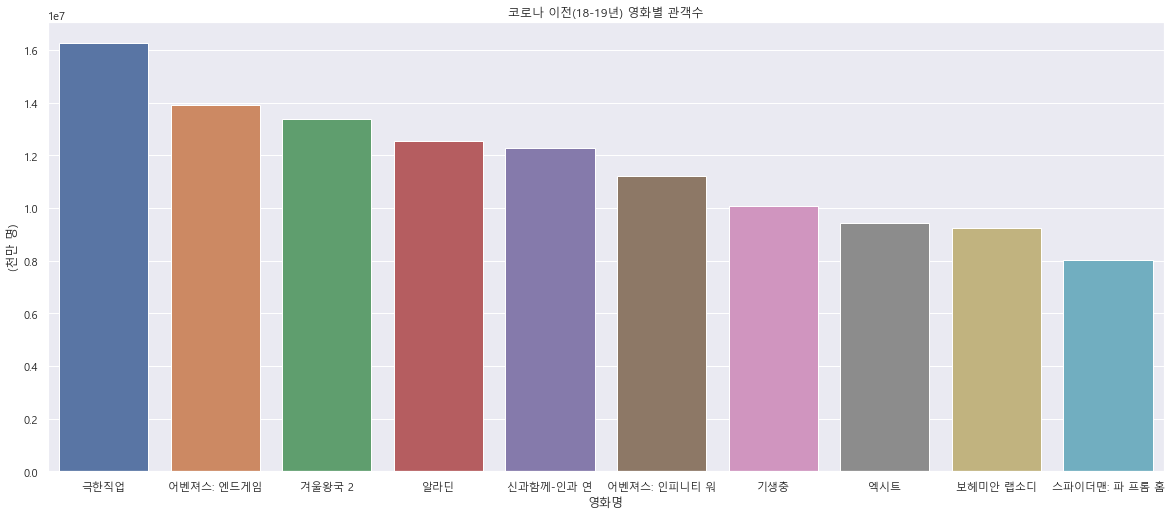

In [8]:
ax = plt.subplots()
ax = sns.barplot(x="영화명", y="관객수", data=top10_box_before)
sns.set(rc={'figure.figsize':(20,8.27)})
plt.title("코로나 이전(18-19년) 영화별 관객수")
plt.ylabel('(천만 명)')
set_plt()
plt.show()

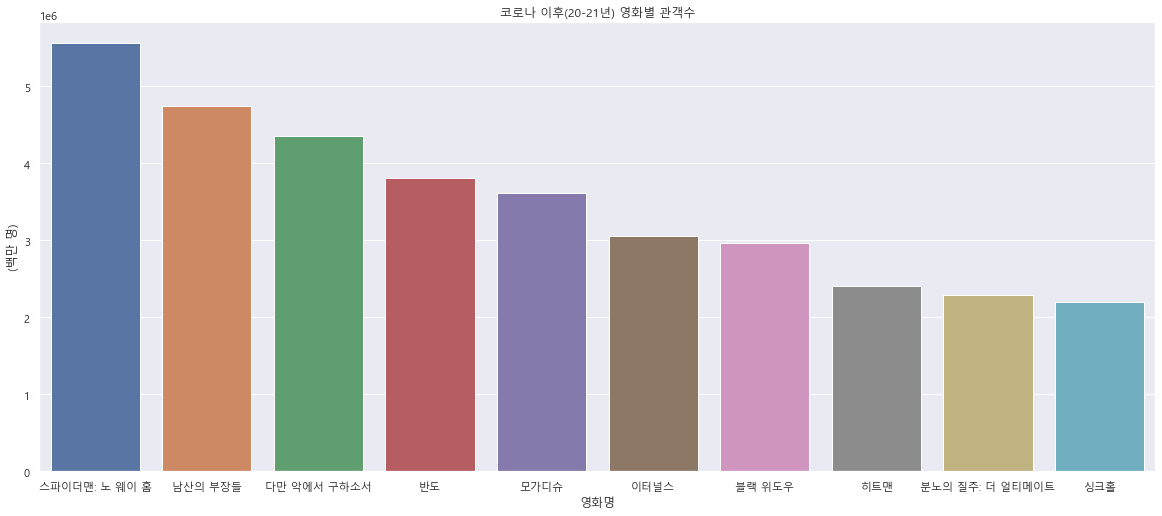

In [9]:
ax = plt.subplots()
ax = sns.barplot(x="영화명", y="관객수", data=top10_box_after)
sns.set(rc={'figure.figsize':(20,8.27)})
plt.title("코로나 이후(20-21년) 영화별 관객수")
plt.ylabel('(백만 명)')
set_plt()
plt.show()

In [10]:
# 장르 데이터프레임과 합치기
top10_before = pd.merge(top10_box_before, df_genre_before)
top10_after = pd.merge(top10_box_after, df_genre_after)

## 시각화 - TOP 10 영화의 장르별 관객수

In [11]:
before_genre_viewer = top10_before.groupby('장르')['관객수'].agg(**{
    'genre_sum':'sum',
}).reset_index() 

after_genre_viewer = top10_after.groupby('장르')['관객수'].agg(**{
    'genre_sum':'sum',
}).reset_index() 
after_genre_viewer

,장르,genre_sum
0,드라마,6946028
1,범죄,4357803
2,액션,21291661
3,코미디,2406232


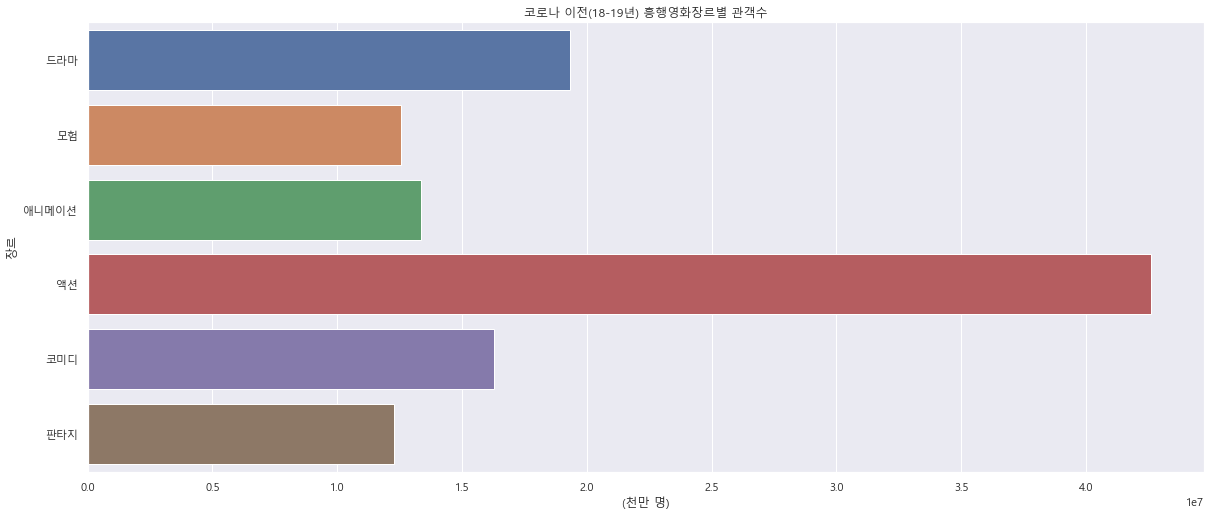

In [12]:
ax = plt.subplots()
ax = sns.barplot(x=before_genre_viewer.iloc[:,1], y=before_genre_viewer.iloc[:,0], data=before_genre_viewer)
sns.set(rc={'figure.figsize':(20,8.27)})
plt.title("코로나 이전(18-19년) 흥행영화장르별 관객수")
plt.xlabel('(천만 명)')
set_plt()
plt.show()

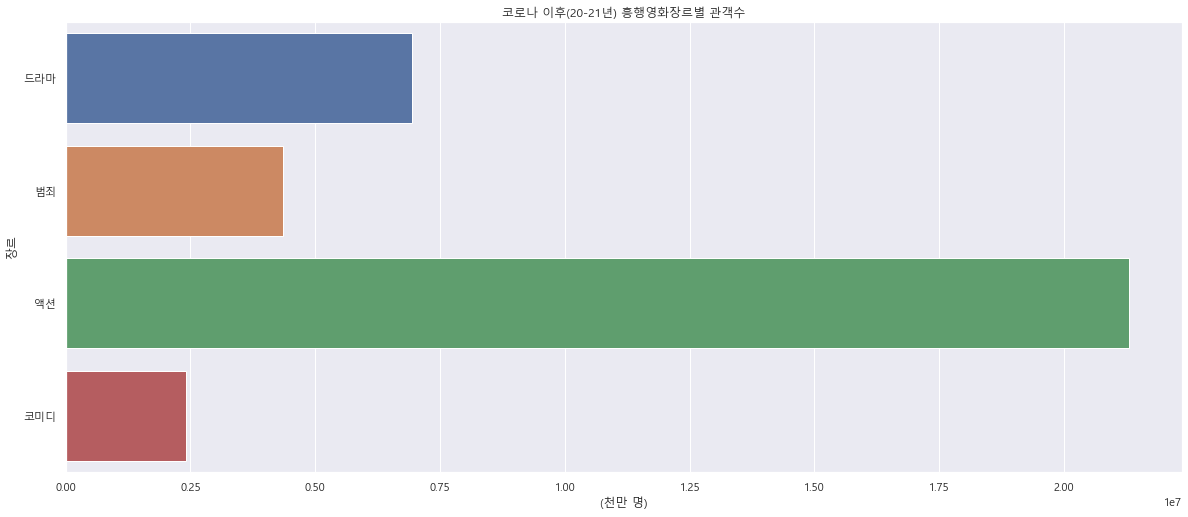

In [13]:
ax = plt.subplots()
ax = sns.barplot(x=after_genre_viewer.iloc[:,1], y=after_genre_viewer.iloc[:,0], data=after_genre_viewer)
sns.set(rc={'figure.figsize':(20,8.27)})
plt.title("코로나 이후(20-21년) 흥행영화장르별 관객수")
plt.xlabel('(천만 명)')
set_plt()
plt.show()

## 분석 - 장르별 관객수 차이

In [14]:
for i in range(len(before_genre_viewer)):
    try:
        관객수 = round(before_genre_viewer.loc[i,"genre_sum"] / before_genre_viewer.loc[i+1,"genre_sum"], 2)
        장르1 = before_genre_viewer.loc[i,"장르"]
        장르2 = before_genre_viewer.loc[i+1,"장르"]
        print(f'코로나 이전, {장르1}장르의 관객수는 {장르2}장르의 관객수의 {관객수}배다.')
    except Exception:
        pass
관객수 = round(before_genre_viewer.loc[0,"genre_sum"] / before_genre_viewer.loc[5,"genre_sum"], 2)
장르1 = before_genre_viewer.loc[0,"장르"]
장르2 = before_genre_viewer.loc[5,"장르"]
print(f'코로나 이전, {장르1}장르의 관객수는 {장르2}장르의 관객수의 {관객수}배다.')

코로나 이전, 드라마장르의 관객수는 모험장르의 관객수의 1.54배다.
코로나 이전, 모험장르의 관객수는 애니메이션장르의 관객수의 0.94배다.
코로나 이전, 애니메이션장르의 관객수는 액션장르의 관객수의 0.31배다.
코로나 이전, 액션장르의 관객수는 코미디장르의 관객수의 2.62배다.
코로나 이전, 코미디장르의 관객수는 판타지장르의 관객수의 1.33배다.
코로나 이전, 드라마장르의 관객수는 판타지장르의 관객수의 1.57배다.


In [15]:
for i in range(len(after_genre_viewer)):
    try:
        관객수 = round(after_genre_viewer.loc[i,"genre_sum"] / after_genre_viewer.loc[i+1,"genre_sum"], 2)
        장르1 = after_genre_viewer.loc[i,"장르"]
        장르2 = after_genre_viewer.loc[i+1,"장르"]
        print(f'코로나 이후, {장르1}장르의 관객수는 {장르2}장르의 관객수의 {관객수}배다.')
    except Exception:
        pass
관객수 = round(after_genre_viewer.loc[0,"genre_sum"] / after_genre_viewer.loc[3,"genre_sum"], 2)
장르1 = after_genre_viewer.loc[0,"장르"]
장르2 = after_genre_viewer.loc[3,"장르"]
print(f'코로나 이전, {장르1}장르의 관객수는 {장르2}장르의 관객수의 {관객수}배다.')

코로나 이후, 드라마장르의 관객수는 범죄장르의 관객수의 1.59배다.
코로나 이후, 범죄장르의 관객수는 액션장르의 관객수의 0.2배다.
코로나 이후, 액션장르의 관객수는 코미디장르의 관객수의 8.85배다.
코로나 이전, 드라마장르의 관객수는 코미디장르의 관객수의 2.89배다.


# 2. 한국 천만영화의 주연 배우, 감독별 기대 관객수

In [16]:
# 데이터 준비
## 필요한 열만 추출
df_box_before2 = box_before_copy[['영화명','매출액','관객수','상영횟수','대표국적']]
df_box_after2 = box_after_copy[['영화명','매출액','관객수','상영횟수','대표국적']]

## 전처리

In [17]:
# NaN값 삭제
df_box_before2 = df_box_before2.dropna()
df_box_after2 = df_box_after2.dropna()

# 관객수 순으로 정렬
df_box_before2 = df_box_before2.sort_values(by='관객수', ascending=False)
df_box_after2 = df_box_after2.sort_values(by='관객수', ascending=False)

In [18]:
# 한국 영화 중 관객수 TOP 30 선정
box_before_kr = df_box_before2[df_box_before2['대표국적'] == '한국']
box_after_kr = df_box_after2[df_box_after2['대표국적'] == '한국']

kr_top30_before = box_before_kr.iloc[:30].reset_index()
kr_top30_after = box_after_kr.iloc[:31].reset_index() 

In [19]:
# 한국, 태국 합작의 '랑종' 데이터 제외
kr_top30_after = kr_top30_after[kr_top30_after.영화명!='랑종']
# 복사본으로 작업, 인덱스 리셋
kr_top30_before_copy = kr_top30_before.reset_index()
kr_top30_after_copy = kr_top30_after.reset_index()

# 복사본으로 작업
act_before_copy = act_before.reset_index()
act_after_copy = act_after.reset_index()

## 분석 - 감독별 관객수 합산

In [20]:
# 감독, 관객수 데이터 합치기
dir_view_before = pd.concat([kr_top30_before_copy['영화명'], kr_top30_before_copy['관객수'], act_before_copy['감독']], axis = 1)
dir_view_after = pd.concat([kr_top30_after_copy['영화명'], kr_top30_after_copy['관객수'], act_after_copy['감독']], axis = 1)

In [21]:
# 감독별 흥행영화 수 확인
print(dir_view_before['감독'].value_counts())
print(dir_view_after['감독'].value_counts())

# => 신과함께 시리즈를 연출한 김용화 감독의 영화 관객수 합산
a = dir_view_before[dir_view_before['감독'] == '김용화'].sum()
b = a.loc['관객수']
dir_view_before['관객수'] = dir_view_before['관객수'].replace(12274996, b)
dir_view_before = dir_view_before.drop([dir_view_before.index[5]])

김용화    2
이병헌    1
최성현    1
조규장    1
최정열    1
이한     1
이장훈    1
정범식    1
엄유나    1
이석근    1
김한결    1
이언희    1
박훈정    1
이원태    1
박누리    1
김도영    1
최국희    1
김태균    1
손용호    1
원신연    1
윤종빈    1
이해영    1
장준환    1
이재규    1
김광식    1
이해준    1
이상근    1
봉준호    1
정지영    1
Name: 감독, dtype: int64
우민호    1
홍원찬    1
손원평    1
김봉한    1
정가영    1
김태윤    1
김용훈    1
이장훈    1
최정열    1
윤재근    1
박상현    1
김창주    1
허진호    1
손재곤    1
이철하    1
김광빈    1
김선     1
박정배    1
장유정    1
이종필    1
필감성    1
강대규    1
양우석    1
조일형    1
이해준    1
김지훈    1
최원섭    1
류승완    1
연상호    1
조은지    1
Name: 감독, dtype: int64


## 시각화 - 감독별 관객수 합산

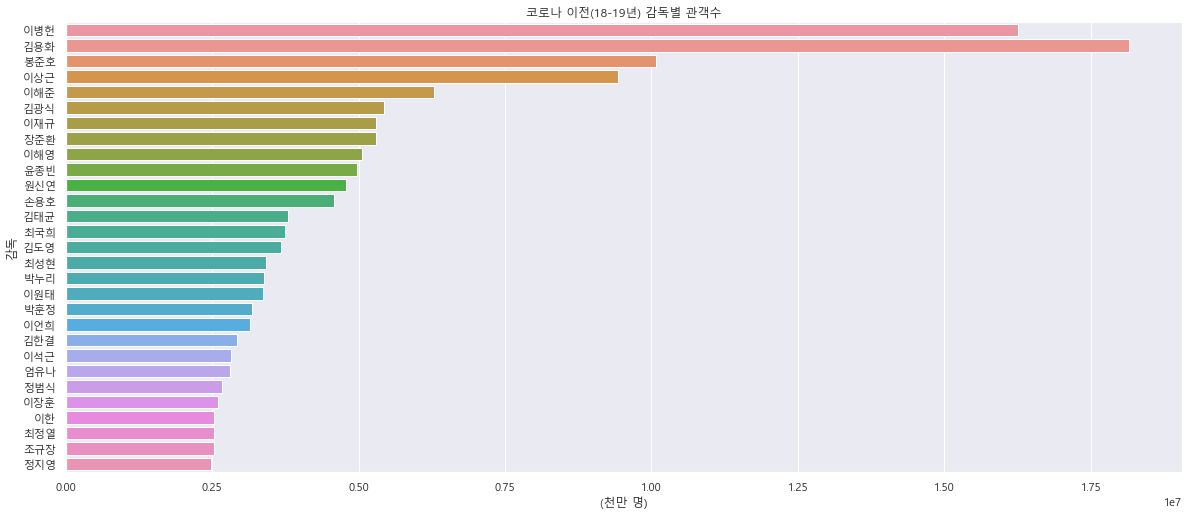

In [22]:
ax = plt.subplots()
ax = sns.barplot(x="관객수", y="감독", data=dir_view_before)
sns.set(rc={'figure.figsize':(20,8.27)})
plt.title("코로나 이전(18-19년) 감독별 관객수")
plt.xlabel('(천만 명)')
set_plt()
plt.show()

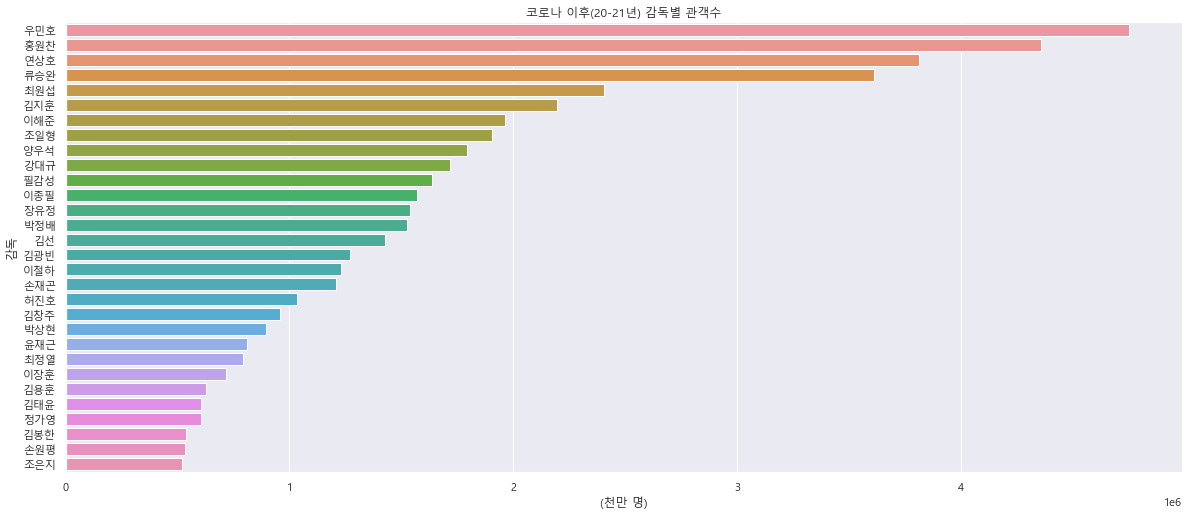

In [23]:
ax = plt.subplots()
ax = sns.barplot(x="관객수", y="감독", data=dir_view_after)
sns.set(rc={'figure.figsize':(20,8.27)})
plt.title("코로나 이후(20-21년) 감독별 관객수")
plt.xlabel('(천만 명)')
set_plt()
plt.show()

## 분석 - 흥행영화 배우 통계

In [24]:
# 주연 카운트
df_act_before = act_before_copy.주연.str.split(',', expand=True)
df_act_after = act_after_copy.주연.str.split(',', expand=True)
df_act_before_t = pd.concat([df_act_before[0], df_act_before[1],df_act_before[2],df_act_before[3],df_act_before[4],df_act_before[5],df_act_before[6]], axis = 0).dropna()
df_act_after_t = pd.concat([df_act_after[0], df_act_after[1],df_act_after[2],df_act_after[3],df_act_after[4],df_act_after[5],df_act_after[6]], axis = 0).dropna()

In [25]:
# 최다 흥행 배우
act_before = df_act_before_t.value_counts().head(1)
act_after = df_act_after_t.value_counts().head(1)

print(f'코로나 이전, 가장 흥행을 이끈 배우 (작품수) : {act_before}')
print(f'코로나 이후, 가장 흥행을 이끈 배우 (작품수) : {act_after}')

코로나 이전, 가장 흥행을 이끈 배우 (작품수) : 마동석    6
dtype: int64
코로나 이후, 가장 흥행을 이끈 배우 (작품수) : 김희원    4
dtype: int64
